# Environment Setup

In [ ]:
!pip install pandas numpy matplotlib scikit-learn statsmodels tensorflow mlflow flask fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 623.0/623.0 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


# Step 1: Data Preparation

In [ ]:
import os
import requests
import json
from datetime import datetime
import pandas as pd

# Define constants
API_KEY = ""  # Replace with your OpenWeatherMap API Key
BASE_URL = "http://api.openweathermap.org/data/2.5/forecast"
DATA_DIR = "data"

# Ensure the data directory exists
os.makedirs(DATA_DIR, exist_ok=True)

def fetch_weather_data(lat, lon):
    """
    Fetch weather data from the OpenWeatherMap API and save it in the specified data directory.
    """
    print("Fetching data...")  # Debug log
    params = {
        "lat": lat,
        "lon": lon,
        "appid": API_KEY
    }
    try:
        response = requests.get(BASE_URL, params=params)
        print(f"Response status code: {response.status_code}")  # Debug log

        if response.status_code == 200:
            data = response.json()

            # Extract relevant fields from the API response
            processed_data = []
            for entry in data["list"]:
                processed_data.append({
                    "datetime": entry["dt_txt"],
                    "temperature": entry["main"]["temp"],  # Kelvin
                    "feels_like": entry["main"]["feels_like"],  # Kelvin
                    "humidity": entry["main"]["humidity"],  # Percentage
                    "pressure": entry["main"]["pressure"],  # hPa
                    "wind_speed": entry["wind"]["speed"],  # m/s
                    "wind_deg": entry["wind"]["deg"],  # Degrees
                    "weather_main": entry["weather"][0]["main"],  # Weather description (e.g., Clear, Clouds)
                    "weather_description": entry["weather"][0]["description"],  # Detailed weather description
                })

            # Convert the extracted data to a DataFrame
            df = pd.DataFrame(processed_data)
            print("Sample of fetched data:")
            print(df.head())

            # Save the processed data as a timestamped CSV file
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            filename = os.path.join(DATA_DIR, f"environmental_data_{timestamp}.csv")
            df.to_csv(filename, index=False)
            print(f"Data saved to {filename}")
        else:
            print(f"Failed to fetch data. Status Code: {response.status_code}, Response: {response.text}")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    print("Script started...")  # Debug log
    fetch_weather_data(lat=40.7128, lon=-74.0060)  # Example: New York City
    print("Script finished.")  # Debug log


Script started...
Fetching data...
Response status code: 200
Sample of fetched data:
              datetime  temperature  feels_like  humidity  pressure  \
0  2024-12-14 12:00:00       270.68      266.92        57      1047   
1  2024-12-14 15:00:00       271.36      267.46        49      1047   
2  2024-12-14 18:00:00       272.69      270.22        39      1046   
3  2024-12-14 21:00:00       274.03      271.89        28      1046   
4  2024-12-15 00:00:00       273.52      270.61        32      1046   

   wind_speed  wind_deg weather_main weather_description  
0        2.76        40        Clear           clear sky  
1        3.04        37        Clear           clear sky  
2        1.95        14        Clear           clear sky  
3        1.86         2        Clear           clear sky  
4        2.46        37        Clear           clear sky  
Data saved to data/environmental_data_20241214_104137.csv
Script finished.


In [ ]:
# Handle missing values
df.fillna(method="ffill", inplace=True)

# Remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


<ipython-input-7-7266a9ca63f2>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


Data loaded successfully.


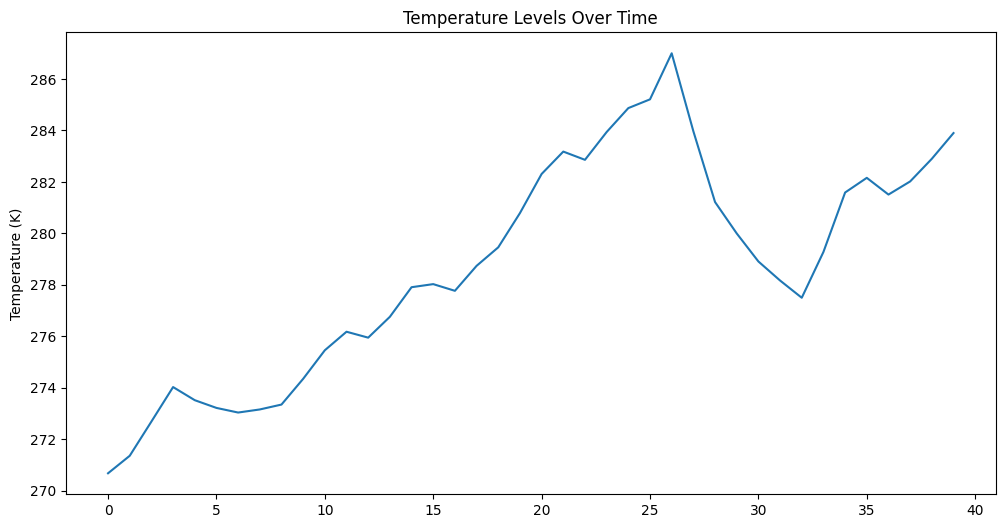

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (replace with your actual data loading code)
try:
    df = pd.read_csv(r"data/environmental_data_20241214_104137.csv")  # Ensure this file exists and is not empty
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: File not found.")
    df = pd.DataFrame()  # Create an empty DataFrame as a fallback

# Check if DataFrame is empty
if df.empty:
    print("Error: The DataFrame is empty. Please check your data source.")
else:
    # Handle missing values
    df.ffill(inplace=True)

    # Remove outliers (only for numeric columns)
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

    # Standardize column names
    if df.columns.dtype == "object":
        df.columns = df.columns.str.strip().str.lower()

    # Plot temperature levels if the column exists
    if "temperature" in df.columns:
        df["temperature"].plot(figsize=(12, 6), title="Temperature Levels Over Time", ylabel="Temperature (K)")
        plt.show()
    else:
        print("Error: Column 'temperature' does not exist in the DataFrame.")


# Step 2: Model Development

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 77786.6328
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 77649.8750 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 77719.0703
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 77652.7109 
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 77312.5234 
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 77324.7266 
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 77479.7188 
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 76986.3438 
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 77086.5547 
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 77057.3359 
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 76891.3438 
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 77322.5703 
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 77027.0000 
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 76895.7891 
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - los

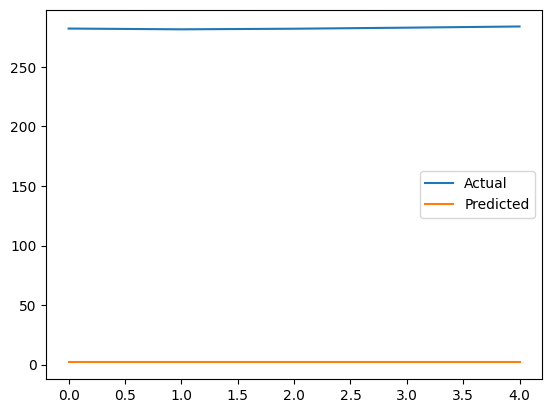

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

look_back = 3
X_train, y_train = create_dataset(train["temperature"].values, look_back)
X_test, y_test = create_dataset(test["temperature"].values, look_back)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], look_back, 1))
X_test = X_test.reshape((X_test.shape[0], look_back, 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Predict and plot
predictions = model.predict(X_test)
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()



In [ ]:
#to enhance the results
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Scale both input features and target
train_scaled = scaler.fit_transform(train[["temperature"]].values)  # Replace 'temperature' with your target column
test_scaled = scaler.transform(test[["temperature"]].values)

# Prepare datasets
look_back = 3
X_train, y_train = create_dataset(train_scaled, look_back)
X_test, y_test = create_dataset(test_scaled, look_back)

# Reshape input to [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], look_back, 1))
X_test = X_test.reshape((X_test.shape[0], look_back, 1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build enhanced LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))  # Add dropout to prevent overfitting
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Single output
model.compile(optimizer="adam", loss="mean_squared_error")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,  # Increased epochs
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 405ms/step - loss: 0.2765 - val_loss: 0.4160
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2479 - val_loss: 0.3546
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1857 - val_loss: 0.2934
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1713 - val_loss: 0.2317
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1167 - val_loss: 0.1707
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0975 - val_loss: 0.1123
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0638 - val_loss: 0.0614
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0282 - val_loss: 0.0242
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0224 - val_loss: 0.0055
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0215 - val_loss: 0.0035
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0283 - val_loss: 0.0057
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0383 - val_loss: 0.0043


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


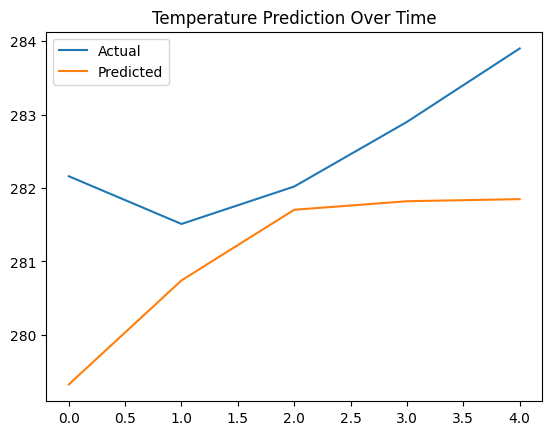

In [ ]:
# Predict and inverse transform
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
import matplotlib.pyplot as plt
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.title("Temperature Prediction Over Time")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 1.4106220703124905
RMSE: 1.6798822810416667


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 531ms/step - loss: 0.3162 - val_loss: 0.4124
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2338 - val_loss: 0.3152
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1422 - val_loss: 0.2227
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1052 - val_loss: 0.1370
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0445 - val_loss: 0.0665
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0160 - val_loss: 0.0204
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0188 - val_loss: 0.0041
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0410 - val_loss: 0.0028
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0368 - val_loss: 0.0055
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0268 - val_loss: 0.0136
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0116 - val_loss: 0.0268
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0073 - val_loss: 0.0419
Epoch 13/50

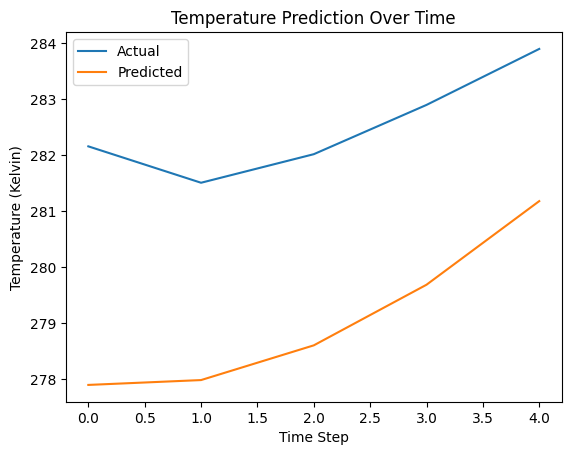

In [ ]:
#more improved code
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select numeric columns for scaling
numeric_cols = ["temperature", "feels_like", "humidity", "pressure", "wind_speed"]

# Scale training and testing data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[numeric_cols].values)
test_scaled = scaler.transform(test[numeric_cols].values)

# Function to create dataset for LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back, 0])  # Predicting the first column (temperature)
    return np.array(X), np.array(y)

look_back = 3
X_train, y_train = create_dataset(train_scaled, look_back)
X_test, y_test = create_dataset(test_scaled, look_back)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], look_back, len(numeric_cols)))
X_test = X_test.reshape((X_test.shape[0], look_back, len(numeric_cols)))

# Enhanced LSTM Model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(look_back, len(numeric_cols))))
model.add(Dropout(0.3))  # Dropout for regularization
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))  # Single output
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Increased epochs
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

# Predict
predictions = model.predict(X_test)

# Adjust predictions and y_test for inverse transform
# Create placeholders for the full feature set
predictions_expanded = np.zeros((predictions.shape[0], len(numeric_cols)))
predictions_expanded[:, 0] = predictions.flatten()  # Only the first column (temperature) is predicted

y_test_expanded = np.zeros((y_test.shape[0], len(numeric_cols)))
y_test_expanded[:, 0] = y_test.flatten()

# Inverse transform
predictions = scaler.inverse_transform(predictions_expanded)[:, 0]
y_test = scaler.inverse_transform(y_test_expanded)[:, 0]

# Metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Plot
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.title("Temperature Prediction Over Time")
plt.ylabel("Temperature (Kelvin)")
plt.xlabel("Time Step")
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - loss: 0.2951 - val_loss: 0.0865 - learning_rate: 0.0100
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1134 - val_loss: 0.1072 - learning_rate: 0.0100
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1362 - val_loss: 0.0379 - learning_rate: 0.0100
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0474 - val_loss: 0.0424 - learning_rate: 0.0100
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0476 - val_loss: 0.0197 - learning_rate: 0.0100
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0282 - val_loss: 0.0182 - learning_rate: 0.0100
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0274 - val_loss: 0.0117 - learning_rate: 0.0100
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0154 - val_loss: 0.0127 - learning_rate: 0.0100
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0263 - val_loss: 0.0118 - learning_rate: 0.0100
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

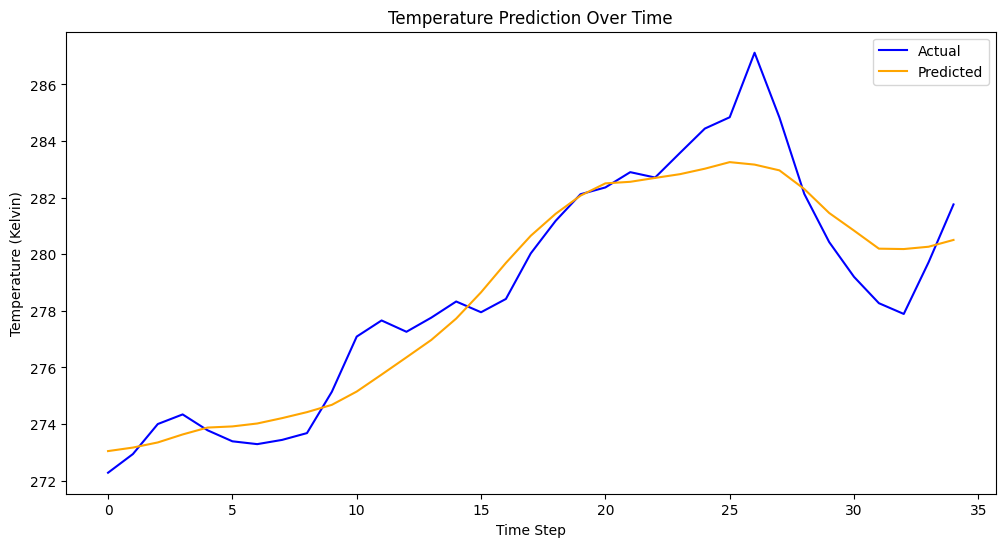

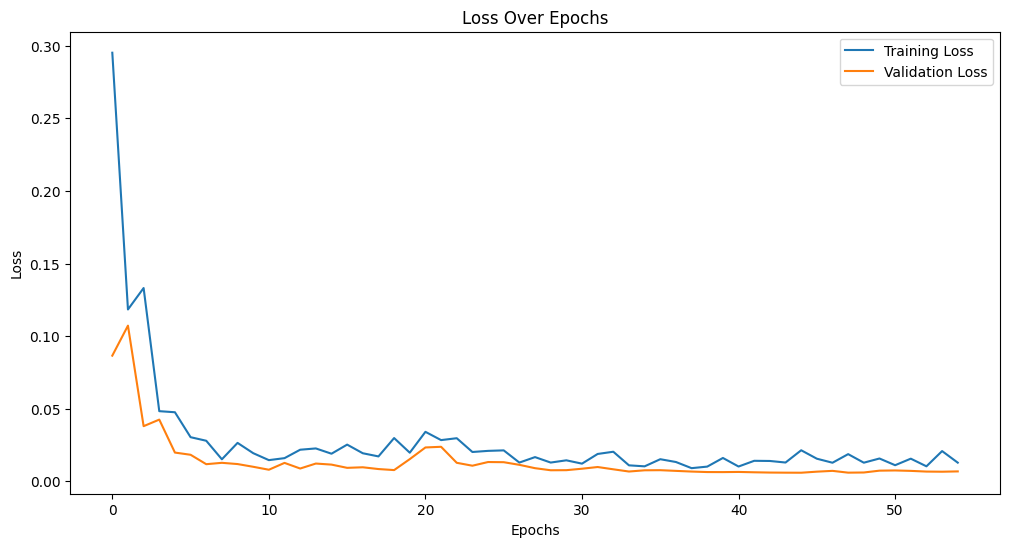

In [ ]:
#more improved
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset (replace with your dataset loading code)
# Ensure your data has numeric columns like 'temperature', 'humidity', etc.
numeric_cols = ["temperature", "feels_like", "humidity", "pressure", "wind_speed"]
train = pd.read_csv("train.csv")  # Replace with your train data file
test = pd.read_csv("test.csv")    # Replace with your test data file

# Scale features
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()

train_inputs_scaled = input_scaler.fit_transform(train[numeric_cols].values)
train_targets_scaled = output_scaler.fit_transform(train[["temperature"]].values)

test_inputs_scaled = input_scaler.transform(test[numeric_cols].values)
test_targets_scaled = output_scaler.transform(test[["temperature"]].values)

# Prepare data for LSTM
def create_dataset(inputs, targets, look_back=1):
    X, y = [], []
    for i in range(len(inputs) - look_back):
        X.append(inputs[i:i + look_back])
        y.append(targets[i + look_back])
    return np.array(X), np.array(y)

look_back = 5  # Choose a look-back window
X_train, y_train = create_dataset(train_inputs_scaled, train_targets_scaled, look_back)
X_test, y_test = create_dataset(test_inputs_scaled, test_targets_scaled, look_back)

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], look_back, len(numeric_cols)))
X_test = X_test.reshape((X_test.shape[0], look_back, len(numeric_cols)))

# Build LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(look_back, len(numeric_cols))))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error")

# Callbacks for optimization
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predict and inverse transform
predictions = model.predict(X_test)
predictions_expanded = np.zeros((predictions.shape[0], input_scaler.n_features_in_))
predictions_expanded[:, 0] = predictions.flatten()
predictions = output_scaler.inverse_transform(predictions_expanded)[:, 0]

y_test_expanded = np.zeros((y_test.shape[0], input_scaler.n_features_in_))
y_test_expanded[:, 0] = y_test.flatten()
y_test = output_scaler.inverse_transform(y_test_expanded)[:, 0]

# Metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", color="blue")
plt.plot(predictions, label="Predicted", color="orange")
plt.legend()
plt.title("Temperature Prediction Over Time")
plt.xlabel("Time Step")
plt.ylabel("Temperature (Kelvin)")
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.3578 - val_loss: 0.1182 - learning_rate: 0.0010
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0984 - val_loss: 0.1628 - learning_rate: 0.0010
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1282 - val_loss: 0.1294 - learning_rate: 0.0010
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0893 - val_loss: 0.1049 - learning_rate: 0.0010
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0827 - val_loss: 0.1043 - learning_rate: 0.0010
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0954 - val_loss: 0.1083 - learning_rate: 0.0010
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0773 - val_loss: 0.1174 - learning_rate: 0.0010
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0827 - val_loss: 0.1133 - learning_rate: 0.0010
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0710 - val_loss: 0.1133 - learning_rate: 0.0010
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
MAE: 2.8779574614609102
RMSE: 3.161628594035194
R² Score: -0.04227195830620056


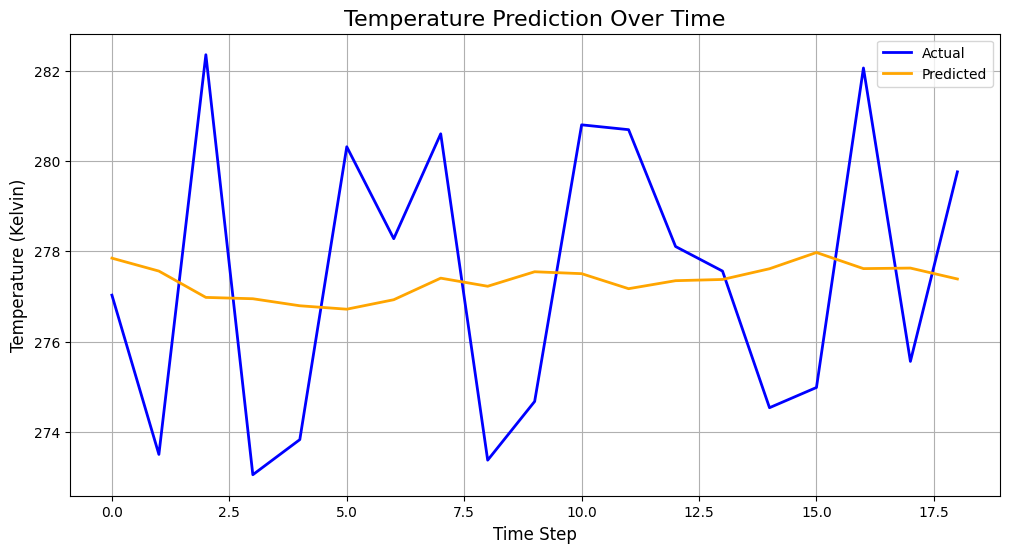

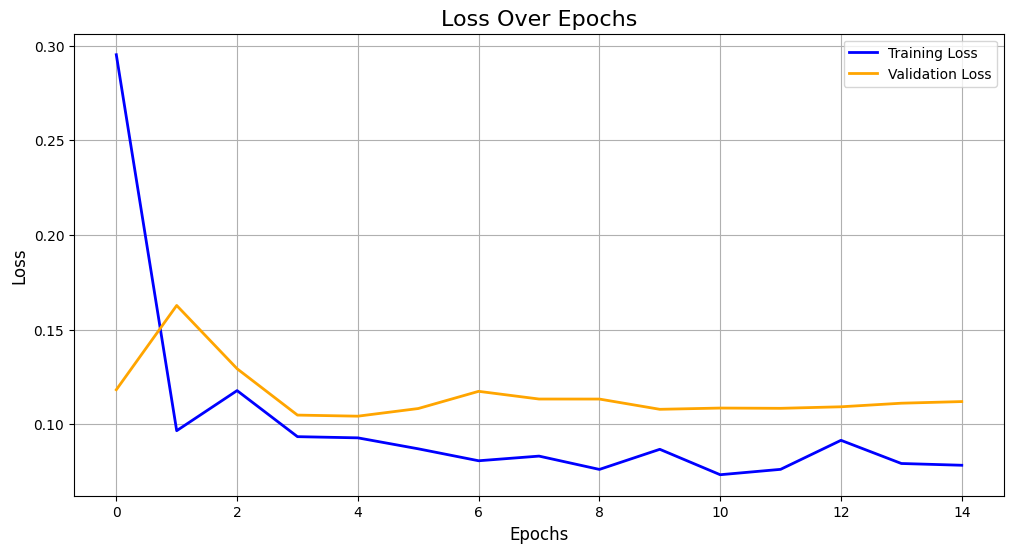

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Ensure data is loaded as a DataFrame
# Replace with your actual data loading method (e.g., reading a CSV or JSON file)
# Example for CSV: data = pd.read_csv("path_to_your_file.csv")
# Example for JSON: data = pd.read_json("path_to_your_file.json")
data = pd.DataFrame({
    "temperature": np.random.rand(100) * 10 + 273,
    "feels_like": np.random.rand(100) * 10 + 270,
    "humidity": np.random.rand(100) * 50 + 30,
    "pressure": np.random.rand(100) * 20 + 1010,
    "wind_speed": np.random.rand(100) * 5
})

# Ensure numeric_cols exist in the DataFrame
numeric_cols = ["temperature", "feels_like", "humidity", "pressure", "wind_speed"]
assert all(col in data.columns for col in numeric_cols), "One or more columns in numeric_cols do not exist in data."

# Scale numeric data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])

# Create datasets
def create_dataset(dataset, look_back=3):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back])
        y.append(dataset[i + look_back, 0])  # Predicting 'temperature'
    return np.array(X), np.array(y)

look_back = 5
X, y = create_dataset(scaled_data, look_back)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(numeric_cols)))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(numeric_cols)))

# Model Building
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(look_back, len(numeric_cols))),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(1)  # Predicting one feature (temperature)
])
model.compile(optimizer="adam", loss="mean_squared_error")

# Callbacks for Optimization
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5)

# Model Training
history = model.fit(
    X_train, y_train,
    epochs=50,  # Reduce epochs to avoid overfitting
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# Prediction and Inverse Transform
predictions = model.predict(X_test)
predictions_expanded = np.zeros((predictions.shape[0], len(numeric_cols)))
predictions_expanded[:, 0] = predictions.flatten()
predictions = scaler.inverse_transform(predictions_expanded)[:, 0]

y_test_expanded = np.zeros((y_test.shape[0], len(numeric_cols)))
y_test_expanded[:, 0] = y_test.flatten()
y_test = scaler.inverse_transform(y_test_expanded)[:, 0]

# Metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Plot: Temperature Prediction
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", color="blue", linewidth=2)
plt.plot(predictions, label="Predicted", color="orange", linewidth=2)
plt.title("Temperature Prediction Over Time", fontsize=16)
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Temperature (Kelvin)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot: Loss Over Epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training Loss", color="blue", linewidth=2)
plt.plot(history.history['val_loss'], label="Validation Loss", color="orange", linewidth=2)
plt.title("Loss Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# Step 3: Train Models with MLflow

In [ ]:
!mlflow ui

[2024-12-14 11:43:40 +0000] [20660] [INFO] Starting gunicorn 23.0.0
[2024-12-14 11:43:40 +0000] [20660] [INFO] Listening at: http://127.0.0.1:5000 (20660)
[2024-12-14 11:43:40 +0000] [20660] [INFO] Using worker: sync
[2024-12-14 11:43:40 +0000] [20665] [INFO] Booting worker with pid: 20665
[2024-12-14 11:43:40 +0000] [20666] [INFO] Booting worker with pid: 20666
[2024-12-14 11:43:40 +0000] [20667] [INFO] Booting worker with pid: 20667
[2024-12-14 11:43:40 +0000] [20668] [INFO] Booting worker with pid: 20668
[2024-12-14 11:57:48 +0000] [20660] [INFO] Handling signal: int

Aborted!
[2024-12-14 11:57:48 +0000] [20666] [INFO] Worker exiting (pid: 20666)
[2024-12-14 11:57:48 +0000] [20665] [INFO] Worker exiting (pid: 20665)
[2024-12-14 11:57:48 +0000] [20668] [INFO] Worker exiting (pid: 20668)
[2024-12-14 11:57:48 +0000] [20667] [INFO] Worker exiting (pid: 20667)
[2024-12-14 11:57:50 +0000] [20660] [INFO] Shutting down: Master


In [ ]:
import mlflow
import pickle

# Save the trained model to a file
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Set up the MLflow experiment
mlflow.set_experiment("Pollution Trend Prediction")

# Log parameters, metrics, and artifacts
with mlflow.start_run():
    mlflow.log_param("model_type", "LSTM")
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_artifact("model.pkl")

print("Model and metrics logged successfully in MLflow.")


Model and metrics logged successfully in MLflow.


# Step 4: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

# Define parameter grid for hyperparameter tuning
param_grid = {
    "lstm_units_1": [64, 128],
    "lstm_units_2": [32, 64],
    "dropout_rate": [0.2, 0.3],
    "batch_size": [16, 32],
    "learning_rate": [0.001, 0.0005]
}

grid = ParameterGrid(param_grid)

# Initialize variables to store the best model and metrics
best_model = None
best_rmse = float("inf")
best_params = None

# Iterate over all combinations of hyperparameters
for params in grid:
    print(f"Testing parameters: {params}")

    # Build the LSTM model with the current hyperparameters
    model = Sequential([
        LSTM(params["lstm_units_1"], return_sequences=True, input_shape=(look_back, len(numeric_cols))),
        Dropout(params["dropout_rate"]),
        LSTM(params["lstm_units_2"], return_sequences=False),
        Dropout(params["dropout_rate"]),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=params["learning_rate"])
    model.compile(optimizer=optimizer, loss="mean_squared_error")

    # Callbacks
    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=20,  # Reduced for faster grid search
        batch_size=params["batch_size"],
        validation_data=(X_test, y_test),
        verbose=1,
        callbacks=[early_stopping, reduce_lr]
    )

    # Predict and calculate RMSE
    predictions = model.predict(X_test)
    predictions_expanded = np.zeros((predictions.shape[0], len(numeric_cols)))
    predictions_expanded[:, 0] = predictions.flatten()
    predictions = scaler.inverse_transform(predictions_expanded)[:, 0]

    y_test_expanded = np.zeros((y_test.shape[0], len(numeric_cols)))
    y_test_expanded[:, 0] = y_test.flatten()
    y_test_actual = scaler.inverse_transform(y_test_expanded)[:, 0]

    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    print(f"RMSE for current parameters: {rmse}")

    # Update the best model if the current RMSE is lower
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        best_params = params

# Display the best hyperparameters and RMSE
print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

# Save the best model for future use
best_model.save("best_lstm_model.h5")


Testing parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'lstm_units_1': 64, 'lstm_units_2': 32}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.4703 - val_loss: 76893.6328 - learning_rate: 0.0010
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2038 - val_loss: 76780.2734 - learning_rate: 0.0010
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1113 - val_loss: 76654.5234 - learning_rate: 0.0010
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0780 - val_loss: 76606.3047 - learning_rate: 0.0010
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1026 - val_loss: 76651.8906 - learning_rate: 0.0010
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0714 - val_loss: 76700.3828 - learning_rate: 0.0010
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0979 - val_loss: 76719.2656 - learning_rate: 0.0010
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0858 - val_loss: 76715.7422 - learning_rate: 5.0000e-04
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0862 - val_loss: 76700.6016 - learning_rate: 5.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.4120 - val_loss: 76858.7656 - learning_rate: 0.0010
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1769 - val_loss: 76698.3750 - learning_rate: 0.0010
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0843 - val_loss: 76581.4766 - learning_rate: 0.0010
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1015 - val_loss: 76636.0781 - learning_rate: 0.0010
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0771 - val_loss: 76705.8672 - learning_rate: 0.0010
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0762 - val_loss: 76717.2734 - learning_rate: 0.0010
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0847 - val_loss: 76704.0469 - learning_rate: 5.0000e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0818 - val_loss: 76683.4766 - learning_rate: 5.0000e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
RMSE for current parameters: 2709.30876325704
Testing parameters: {'batch_s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.3331 - val_loss: 76794.3906 - learning_rate: 0.0010
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0997 - val_loss: 76610.6953 - learning_rate: 0.0010
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1116 - val_loss: 76621.5859 - learning_rate: 0.0010
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0957 - val_loss: 76712.8516 - learning_rate: 0.0010
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0970 - val_loss: 76733.5703 - learning_rate: 0.0010
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0959 - val_loss: 76721.3750 - learning_rate: 5.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0948 - val_loss: 76697.7734 - learning_rate: 5.0000e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
RMSE for current parameters: 2709.8257824037523
Testing parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'lstm_units_1': 128, 'lstm_units_2': 64}
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.4184 - val_loss: 76808.7266 - learning_rate: 0.0010
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1268 - val_loss: 76602.9766 - learning_rate: 0.0010
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1075 - val_loss: 76632.6797 - learning_rate: 0.0010
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0930 - val_loss: 76711.9375 - learning_rate: 0.0010
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0890 - val_loss: 76728.2734 - learning_rate: 0.0010
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0954 - val_loss: 76711.6875 - learning_rate: 5.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0790 - val_loss: 76688.9609 - learning_rate: 5.0000e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
RMSE for current parameters: 2709.689091314318
Testing parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'lstm_units_1': 64, 'lstm_units_2': 32}
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.2974 - val_loss: 76881.4375 - learning_rate: 5.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2165 - val_loss: 76822.9375 - learning_rate: 5.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1743 - val_loss: 76758.7109 - learning_rate: 5.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1091 - val_loss: 76693.7656 - learning_rate: 5.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0820 - val_loss: 76647.7734 - learning_rate: 5.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1141 - val_loss: 76643.1328 - learning_rate: 5.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0896 - val_loss: 76663.6172 - learning_rate: 5.0000e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0738 - val_loss: 76685.3516 - learning_rate: 5.0000e-04
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0906 - val_loss: 76707.0469 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 0.3558 - val_loss: 76905.5938 - learning_rate: 5.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2438 - val_loss: 76827.3203 - learning_rate: 5.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1653 - val_loss: 76739.2109 - learning_rate: 5.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0924 - val_loss: 76657.0000 - learning_rate: 5.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0823 - val_loss: 76622.9531 - learning_rate: 5.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0990 - val_loss: 76643.2734 - learning_rate: 5.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0892 - val_loss: 76673.9375 - learning_rate: 5.0000e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0871 - val_loss: 76691.9453 - learning_rate: 5.0000e-04
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0948 - val_loss: 76693.4844 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.4438 - val_loss: 76927.0312 - learning_rate: 5.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2684 - val_loss: 76840.8359 - learning_rate: 5.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1552 - val_loss: 76744.4219 - learning_rate: 5.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1142 - val_loss: 76650.7969 - learning_rate: 5.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0845 - val_loss: 76620.1484 - learning_rate: 5.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0967 - val_loss: 76654.5781 - learning_rate: 5.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0807 - val_loss: 76687.7812 - learning_rate: 5.0000e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0857 - val_loss: 76706.2812 - learning_rate: 5.0000e-04
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0815 - val_loss: 76706.5625 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.3194 - val_loss: 76855.5156 - learning_rate: 5.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1703 - val_loss: 76727.8984 - learning_rate: 5.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0946 - val_loss: 76616.4375 - learning_rate: 5.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0892 - val_loss: 76611.4297 - learning_rate: 5.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1035 - val_loss: 76667.1953 - learning_rate: 5.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0844 - val_loss: 76700.7344 - learning_rate: 5.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0688 - val_loss: 76708.2344 - learning_rate: 5.0000e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0824 - val_loss: 76702.2891 - learning_rate: 2.5000e-04
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0873 - val_loss: 76689.8125 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.3988 - val_loss: 76881.9453 - learning_rate: 0.0010
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1963 - val_loss: 76745.9688 - learning_rate: 0.0010
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1063 - val_loss: 76619.8125 - learning_rate: 0.0010
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1134 - val_loss: 76627.4766 - learning_rate: 0.0010
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1033 - val_loss: 76686.9062 - learning_rate: 0.0010
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0828 - val_loss: 76721.7734 - learning_rate: 0.0010
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0851 - val_loss: 76722.9062 - learning_rate: 5.0000e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0837 - val_loss: 76713.0625 - learning_rate: 5.0000e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
RMSE for current parameters: 2709.98697012328
Testing parameters

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.2769 - val_loss: 76794.5625 - learning_rate: 0.0010
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1049 - val_loss: 76620.2578 - learning_rate: 0.0010
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1111 - val_loss: 76618.2656 - learning_rate: 0.0010
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0960 - val_loss: 76703.9219 - learning_rate: 0.0010
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0820 - val_loss: 76737.3672 - learning_rate: 0.0010
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0918 - val_loss: 76710.1875 - learning_rate: 0.0010
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0909 - val_loss: 76691.5391 - learning_rate: 5.0000e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0749 - val_loss: 76674.6484 - learning_rate: 5.0000e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
RMSE for current parameters: 2709.959577760837
Testing parameters: {'batch_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.2899 - val_loss: 76766.9766 - learning_rate: 0.0010
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0881 - val_loss: 76598.9688 - learning_rate: 0.0010
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1139 - val_loss: 76647.9375 - learning_rate: 0.0010
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0820 - val_loss: 76723.8438 - learning_rate: 0.0010
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0947 - val_loss: 76740.7734 - learning_rate: 0.0010
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0923 - val_loss: 76726.7500 - learning_rate: 5.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0945 - val_loss: 76701.5703 - learning_rate: 5.0000e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
RMSE for current parameters: 2709.6181698813202
Testing parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'lstm_units_1': 128, 'lstm_units_2': 64}
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.3117 - val_loss: 76742.2891 - learning_rate: 0.0010
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1137 - val_loss: 76585.2812 - learning_rate: 0.0010
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1129 - val_loss: 76683.9922 - learning_rate: 0.0010
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0717 - val_loss: 76725.4766 - learning_rate: 0.0010
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0975 - val_loss: 76710.9922 - learning_rate: 0.0010
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0834 - val_loss: 76691.9062 - learning_rate: 5.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0878 - val_loss: 76670.8047 - learning_rate: 5.0000e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
RMSE for current parameters: 2709.376216268125
Testing parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'lstm_units_1': 64, 'lstm_units_2': 32}
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - loss: 0.2994 - val_loss: 76885.3438 - learning_rate: 5.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2402 - val_loss: 76815.0234 - learning_rate: 5.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1214 - val_loss: 76746.1953 - learning_rate: 5.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1052 - val_loss: 76680.2031 - learning_rate: 5.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0770 - val_loss: 76638.1562 - learning_rate: 5.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1092 - val_loss: 76631.6328 - learning_rate: 5.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1004 - val_loss: 76651.1953 - learning_rate: 5.0000e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1039 - val_loss: 76680.1562 - learning_rate: 5.0000e-04
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0771 - val_loss: 76696.0234 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.4236 - val_loss: 76919.7031 - learning_rate: 5.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2515 - val_loss: 76854.8672 - learning_rate: 5.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1703 - val_loss: 76780.1562 - learning_rate: 5.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1138 - val_loss: 76698.9766 - learning_rate: 5.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0880 - val_loss: 76645.0625 - learning_rate: 5.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0944 - val_loss: 76638.1016 - learning_rate: 5.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1023 - val_loss: 76664.5469 - learning_rate: 5.0000e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1010 - val_loss: 76697.7109 - learning_rate: 5.0000e-04
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0942 - val_loss: 76709.3672 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - loss: 0.4310 - val_loss: 76900.0312 - learning_rate: 5.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2437 - val_loss: 76818.6719 - learning_rate: 5.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1352 - val_loss: 76725.7109 - learning_rate: 5.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0841 - val_loss: 76641.2344 - learning_rate: 5.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1147 - val_loss: 76627.5156 - learning_rate: 5.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1011 - val_loss: 76657.0625 - learning_rate: 5.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0857 - val_loss: 76690.4375 - learning_rate: 5.0000e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0770 - val_loss: 76712.1875 - learning_rate: 5.0000e-04
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0957 - val_loss: 76711.0781 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.3659 - val_loss: 76878.5312 - learning_rate: 5.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1998 - val_loss: 76782.5625 - learning_rate: 5.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1015 - val_loss: 76671.2422 - learning_rate: 5.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1011 - val_loss: 76610.0391 - learning_rate: 5.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1173 - val_loss: 76641.4297 - learning_rate: 5.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0772 - val_loss: 76682.4766 - learning_rate: 5.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0866 - val_loss: 76706.5625 - learning_rate: 5.0000e-04
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0775 - val_loss: 76708.4062 - learning_rate: 2.5000e-04
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0905 - val_loss: 76698.7734 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - loss: 0.4463 - val_loss: 76931.8984 - learning_rate: 0.0010
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.3281 - val_loss: 76865.2266 - learning_rate: 0.0010
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2009 - val_loss: 76792.0234 - learning_rate: 0.0010
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1300 - val_loss: 76710.6484 - learning_rate: 0.0010
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0785 - val_loss: 76635.7891 - learning_rate: 0.0010
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0983 - val_loss: 76607.9062 - learning_rate: 0.0010
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0945 - val_loss: 76627.8516 - learning_rate: 0.0010
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0974 - val_loss: 76658.2891 - learning_rate: 0.0010
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0816 - val_loss: 76686.8750 - learning_rate: 0.0010
Epoch 10/20

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.3382 - val_loss: 76854.5625 - learning_rate: 0.0010
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1752 - val_loss: 76745.4844 - learning_rate: 0.0010
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0963 - val_loss: 76624.2656 - learning_rate: 0.0010
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0882 - val_loss: 76566.7734 - learning_rate: 0.0010
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1297 - val_loss: 76603.5547 - learning_rate: 0.0010
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0920 - val_loss: 76662.1719 - learning_rate: 0.0010
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0820 - val_loss: 76700.8359 - learning_rate: 0.0010
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0790 - val_loss: 76710.7109 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0827 - val_loss: 76711.5625 - learning_rate: 5.0000e-04
1/1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 0.3578 - val_loss: 76866.7109 - learning_rate: 0.0010
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1995 - val_loss: 76760.3516 - learning_rate: 0.0010
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0925 - val_loss: 76639.7109 - learning_rate: 0.0010
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0983 - val_loss: 76585.0547 - learning_rate: 0.0010
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1187 - val_loss: 76629.5938 - learning_rate: 0.0010
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0889 - val_loss: 76683.5781 - learning_rate: 0.0010
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0826 - val_loss: 76722.2031 - learning_rate: 0.0010
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0924 - val_loss: 76728.8125 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0963 - val_loss: 76727.9375 - learning_rate: 5.0000e-04
1/1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - loss: 0.3320 - val_loss: 76824.7734 - learning_rate: 0.0010
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1426 - val_loss: 76670.2734 - learning_rate: 0.0010
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0803 - val_loss: 76575.1016 - learning_rate: 0.0010
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1267 - val_loss: 76625.4844 - learning_rate: 0.0010
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0873 - val_loss: 76690.1484 - learning_rate: 0.0010
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0831 - val_loss: 76723.5312 - learning_rate: 0.0010
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0945 - val_loss: 76723.8984 - learning_rate: 5.0000e-04
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0859 - val_loss: 76713.2031 - learning_rate: 5.0000e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
RMSE for current parameters: 2709.1961521948665
Testing parameters: {'batch

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - loss: 0.4480 - val_loss: 76944.0859 - learning_rate: 5.0000e-04
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3480 - val_loss: 76905.3672 - learning_rate: 5.0000e-04
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2841 - val_loss: 76865.3594 - learning_rate: 5.0000e-04
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2482 - val_loss: 76823.4609 - learning_rate: 5.0000e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1563 - val_loss: 76779.7812 - learning_rate: 5.0000e-04
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1146 - val_loss: 76733.6797 - learning_rate: 5.0000e-04
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0951 - val_loss: 76687.9219 - learning_rate: 5.0000e-04
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0831 - val_loss: 76646.8984 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0898 - val_loss: 76620.8438 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - loss: 0.3492 - val_loss: 76916.1172 - learning_rate: 5.0000e-04
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2606 - val_loss: 76874.5234 - learning_rate: 5.0000e-04
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2189 - val_loss: 76830.1875 - learning_rate: 5.0000e-04
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1676 - val_loss: 76782.7109 - learning_rate: 5.0000e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1091 - val_loss: 76732.9062 - learning_rate: 5.0000e-04
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0778 - val_loss: 76683.4766 - learning_rate: 5.0000e-04
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0800 - val_loss: 76641.1562 - learning_rate: 5.0000e-04
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0929 - val_loss: 76621.1562 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0970 - val_loss: 76627.0391 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - loss: 0.3084 - val_loss: 76869.4297 - learning_rate: 5.0000e-04
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1947 - val_loss: 76809.7656 - learning_rate: 5.0000e-04
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1366 - val_loss: 76746.0234 - learning_rate: 5.0000e-04
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1013 - val_loss: 76683.0000 - learning_rate: 5.0000e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0836 - val_loss: 76637.0625 - learning_rate: 5.0000e-04
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0905 - val_loss: 76615.4375 - learning_rate: 5.0000e-04
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1053 - val_loss: 76625.3281 - learning_rate: 5.0000e-04
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0842 - val_loss: 76642.2734 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0988 - val_loss: 76664.6797 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - loss: 0.4074 - val_loss: 76925.3828 - learning_rate: 5.0000e-04
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2999 - val_loss: 76864.6172 - learning_rate: 5.0000e-04
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1885 - val_loss: 76799.2578 - learning_rate: 5.0000e-04
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1385 - val_loss: 76728.2344 - learning_rate: 5.0000e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0803 - val_loss: 76662.2812 - learning_rate: 5.0000e-04
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0822 - val_loss: 76618.0234 - learning_rate: 5.0000e-04
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1053 - val_loss: 76619.9531 - learning_rate: 5.0000e-04
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0992 - val_loss: 76652.2266 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0894 - val_loss: 76685.6484 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - loss: 0.3249 - val_loss: 76881.4141 - learning_rate: 0.0010
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2145 - val_loss: 76821.3594 - learning_rate: 0.0010
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1410 - val_loss: 76751.1406 - learning_rate: 0.0010
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0951 - val_loss: 76675.1641 - learning_rate: 0.0010
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0840 - val_loss: 76629.1875 - learning_rate: 0.0010
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1001 - val_loss: 76631.1875 - learning_rate: 0.0010
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0794 - val_loss: 76658.2266 - learning_rate: 0.0010
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0719 - val_loss: 76683.0625 - learning_rate: 0.0010
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0825 - val_loss: 76692.8984 - learning_rate: 5.0000e-04
Epoch 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 295ms/step - loss: 0.3491 - val_loss: 76871.7500 - learning_rate: 0.0010
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2044 - val_loss: 76779.5547 - learning_rate: 0.0010
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1010 - val_loss: 76672.8203 - learning_rate: 0.0010
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0848 - val_loss: 76586.3125 - learning_rate: 0.0010
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1385 - val_loss: 76603.3984 - learning_rate: 0.0010
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0945 - val_loss: 76649.7969 - learning_rate: 0.0010
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0826 - val_loss: 76690.9297 - learning_rate: 0.0010
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0868 - val_loss: 76704.1641 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0830 - val_loss: 76707.8828 - learning_rate: 5.0000e-04
1/1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - loss: 0.4609 - val_loss: 76875.3125 - learning_rate: 0.0010
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2104 - val_loss: 76746.1328 - learning_rate: 0.0010
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0908 - val_loss: 76624.7500 - learning_rate: 0.0010
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1227 - val_loss: 76579.2266 - learning_rate: 0.0010
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1015 - val_loss: 76611.9766 - learning_rate: 0.0010
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1100 - val_loss: 76665.3984 - learning_rate: 0.0010
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0925 - val_loss: 76706.6797 - learning_rate: 0.0010
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0824 - val_loss: 76715.3516 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1005 - val_loss: 76714.6719 - learning_rate: 5.0000e-04
1/1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 323ms/step - loss: 0.3984 - val_loss: 76873.4766 - learning_rate: 0.0010
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2005 - val_loss: 76749.8125 - learning_rate: 0.0010
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1000 - val_loss: 76611.8125 - learning_rate: 0.0010
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1044 - val_loss: 76587.6953 - learning_rate: 0.0010
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1075 - val_loss: 76644.9688 - learning_rate: 0.0010
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0834 - val_loss: 76699.3516 - learning_rate: 0.0010
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0836 - val_loss: 76726.2734 - learning_rate: 0.0010
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0837 - val_loss: 76726.2344 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0962 - val_loss: 76714.3125 - learning_rate: 5.0000e-04
1/1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - loss: 0.3840 - val_loss: 76932.0625 - learning_rate: 5.0000e-04
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2967 - val_loss: 76899.7734 - learning_rate: 5.0000e-04
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2565 - val_loss: 76866.7891 - learning_rate: 5.0000e-04
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2117 - val_loss: 76832.7422 - learning_rate: 5.0000e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1739 - val_loss: 76797.0703 - learning_rate: 5.0000e-04
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1145 - val_loss: 76760.1484 - learning_rate: 5.0000e-04
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1191 - val_loss: 76722.0469 - learning_rate: 5.0000e-04
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0933 - val_loss: 76687.4609 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0838 - val_loss: 76659.7344 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - loss: 0.4957 - val_loss: 76960.0000 - learning_rate: 5.0000e-04
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3740 - val_loss: 76918.1484 - learning_rate: 5.0000e-04
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3117 - val_loss: 76874.8984 - learning_rate: 5.0000e-04
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2235 - val_loss: 76829.4531 - learning_rate: 5.0000e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1661 - val_loss: 76781.5391 - learning_rate: 5.0000e-04
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1171 - val_loss: 76730.5625 - learning_rate: 5.0000e-04
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0823 - val_loss: 76678.5781 - learning_rate: 5.0000e-04
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0922 - val_loss: 76634.6484 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0961 - val_loss: 76620.0000 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - loss: 0.4100 - val_loss: 76926.6484 - learning_rate: 5.0000e-04
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2840 - val_loss: 76876.4844 - learning_rate: 5.0000e-04
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2382 - val_loss: 76823.2812 - learning_rate: 5.0000e-04
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1576 - val_loss: 76766.9766 - learning_rate: 5.0000e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1113 - val_loss: 76707.6641 - learning_rate: 5.0000e-04
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1068 - val_loss: 76656.0234 - learning_rate: 5.0000e-04
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0974 - val_loss: 76632.4453 - learning_rate: 5.0000e-04
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0928 - val_loss: 76632.1797 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0928 - val_loss: 76647.4609 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step - loss: 0.4356 - val_loss: 76929.3984 - learning_rate: 5.0000e-04
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.2924 - val_loss: 76865.0859 - learning_rate: 5.0000e-04
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1777 - val_loss: 76795.9531 - learning_rate: 5.0000e-04
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1363 - val_loss: 76720.6016 - learning_rate: 5.0000e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0938 - val_loss: 76648.4219 - learning_rate: 5.0000e-04
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0896 - val_loss: 76604.5234 - learning_rate: 5.0000e-04
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1040 - val_loss: 76598.1641 - learning_rate: 5.0000e-04
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1083 - val_loss: 76627.0625 - learning_rate: 5.0000e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0907 - val_loss: 76664.8125 - l

RMSE for current parameters: 2709.604136361737
Best Parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'lstm_units_1': 64, 'lstm_units_2': 64}
Best RMSE: 2709.048757431695


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.2 MB/s eta 0:00:00


In [ ]:
#improved results
import numpy as np
import pandas as pd
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Data Preparation
data = pd.DataFrame({
    "temperature": np.random.rand(1000) * 10 + 273,
    "humidity": np.random.rand(1000) * 50 + 30,
    "pressure": np.random.rand(1000) * 20 + 1010,
    "wind_speed": np.random.rand(1000) * 5
})
data['target'] = data['temperature']  # Set target variable

# Feature Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Create Lagged Features
def create_dataset(data, target_col, look_back=5):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data.iloc[i:i + look_back].values)
        y.append(data.iloc[i + look_back][target_col])
    return np.array(X), np.array(y)

look_back = 5
X, y = create_dataset(data_scaled, 'target', look_back)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Optuna Objective Function
def objective(trial):
    lstm_units_1 = trial.suggest_int("lstm_units_1", 32, 128)
    lstm_units_2 = trial.suggest_int("lstm_units_2", 32, 128)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)

    model = Sequential([
        Bidirectional(LSTM(lstm_units_1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
        Dropout(dropout_rate),
        Bidirectional(LSTM(lstm_units_2, return_sequences=False)),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss="mean_squared_error")

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=0,
        callbacks=[early_stopping, lr_scheduler]
    )

    val_loss = min(history.history['val_loss'])
    return val_loss

# Run Optuna Study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best Parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Final Model with Best Parameters
model = Sequential([
    Bidirectional(LSTM(best_params['lstm_units_1'], return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(best_params['dropout_rate']),
    Bidirectional(LSTM(best_params['lstm_units_2'], return_sequences=False)),
    Dropout(best_params['dropout_rate']),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss="mean_squared_error")

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Predictions and Evaluation
predictions = model.predict(X_test)
y_test_rescaled = scaler.inverse_transform(np.hstack([np.zeros((len(y_test), X_test.shape[2] - 1)), y_test.reshape(-1, 1)]))[:, -1]
predictions_rescaled = scaler.inverse_transform(np.hstack([np.zeros((len(predictions), X_test.shape[2] - 1)), predictions]))[:, -1]

rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
print(f"RMSE: {rmse}")


[I 2024-12-14 12:21:52,807] A new study created in memory with name: no-name-b0e4652e-a1ff-443d-b963-430739927363
<ipython-input-55-bbc08ab25468>:46: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[I 2024-12-14 12:22:43,025] Trial 0 finished with value: 0.08583692461252213 and parameters: {'lstm_units_1': 55, 'lstm_units_2': 116, 'dropout_rate': 0.4524489014240488, 'learning_rate': 0.0009073420868038716}. Best is trial 0 with value: 0.08583692461252213.
[I 2024-12-14 12:23:20,584

Best Parameters: {'lstm_units_1': 117, 'lstm_units_2': 44, 'dropout_rate': 0.21756626371424903, 'learning_rate': 0.006067991935036522}
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.1401 - val_loss: 0.0870
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0928 - val_loss: 0.0889
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0863 - val_loss: 0.0878
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0870 - val_loss: 0.0875
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0887 - val_loss: 0.0856
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0874 - val_loss: 0.0876
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0864 - val_loss: 0.0883
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0904 - val_loss: 0.0888
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0844 - val_loss: 0.0878
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0890 - val_loss: 0.0855
Epoch 11/50
25

# Model Evaluation

In [ ]:
#more improved hypertraining and evaluation
import numpy as np
import pandas as pd
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Data Preparation
data = pd.DataFrame({
    "temperature": np.random.rand(1000) * 10 + 273,
    "humidity": np.random.rand(1000) * 50 + 30,
    "pressure": np.random.rand(1000) * 20 + 1010,
    "wind_speed": np.random.rand(1000) * 5
})
data['target'] = data['temperature']  # Set target variable

# Scale only the target variable
scaler = MinMaxScaler()
target_scaled = scaler.fit_transform(data[['target']])
data['target_scaled'] = target_scaled

# Create Lagged Features
def create_dataset(data, target_col, look_back=5):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data.iloc[i:i + look_back, :-1].values)  # Use all features except the target
        y.append(data.iloc[i + look_back][target_col])
    return np.array(X), np.array(y)

look_back = 5
X, y = create_dataset(data, 'target_scaled', look_back)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Optuna Objective Function
def objective(trial):
    lstm_units_1 = trial.suggest_int("lstm_units_1", 32, 128)
    lstm_units_2 = trial.suggest_int("lstm_units_2", 32, 128)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    model = Sequential([
        Bidirectional(LSTM(lstm_units_1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
        Dropout(dropout_rate),
        Bidirectional(LSTM(lstm_units_2, return_sequences=False)),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss="mean_squared_error")

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=0,
        callbacks=[early_stopping, lr_scheduler]
    )

    val_loss = min(history.history['val_loss'])
    return val_loss

# Run Optuna Study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best Parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Final Model with Best Parameters
model = Sequential([
    Bidirectional(LSTM(best_params['lstm_units_1'], return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(best_params['dropout_rate']),
    Bidirectional(LSTM(best_params['lstm_units_2'], return_sequences=False)),
    Dropout(best_params['dropout_rate']),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss="mean_squared_error")

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Predictions
predictions = model.predict(X_test)

# Rescale to original scale
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
predictions_rescaled = scaler.inverse_transform(predictions).flatten()

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
mape = np.mean(np.abs((y_test_rescaled - predictions_rescaled) / y_test_rescaled)) * 100

print(f"RMSE: {rmse}, MAE: {mae}, MAPE: {mape}%")


[I 2024-12-14 12:50:43,101] A new study created in memory with name: no-name-a8542ac9-b1f7-4501-99fa-9013a56291a0
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[I 2024-12-14 12:51:33,904] Trial 0 finished with value: 0.0897127091884613 and parameters: {'lstm_units_1': 112, 'lstm_units_2': 80, 'dropout_rate': 0.42226221360091454, 'learning_rate': 0.0024949960638954234}. Best is trial 0 with value: 0.0897127091884613.
[I 2024-12-14 12:51:58,741] Trial 1 finished with value: 0.08965759724378586 and parameters: {'lstm_units_1': 124, 'lstm_units_2': 97, 'dropout_rate': 0.10599899838566006, 'learning_rate': 0.0069545771565814206}. Best is trial 1 with value: 0.08965759724378586.
[I 2024-12-14 12:52:14,502] Trial 2 finished with value: 0.08967562764883041 a

Best Parameters: {'lstm_units_1': 71, 'lstm_units_2': 111, 'dropout_rate': 0.3712449646338149, 'learning_rate': 0.000129032152755044}
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.1465 - val_loss: 0.1003
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.1266 - val_loss: 0.0889
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.1228 - val_loss: 0.0933
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1120 - val_loss: 0.0913
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1088 - val_loss: 0.0933
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1051 - val_loss: 0.1171
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1092 - val_loss: 0.1079
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1092 - val_loss: 0.1073
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1123 - val_loss: 0.0950
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0928 - val_loss: 0.0920
Epoch 11/50
25/

# Save the best model

In [ ]:
# Save the trained model
model.save("best_model.h5")

# Create the Flask API

In [ ]:
import pickle

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
import pickle
import os

# Initialize Flask app
app = Flask(__name__)

# Load the trained model
model_path = "best_model.h5"
if os.path.exists(model_path):
    model = load_model(model_path)
    model.compile(optimizer="adam", loss="mean_squared_error")  # Optional: compile the model if needed
else:
    raise FileNotFoundError(f"Model file not found at {model_path}")

# Load the scaler
scaler_path = "scaler.pkl"
if os.path.exists(scaler_path):
    with open(scaler_path, "rb") as f:
        scaler = pickle.load(f)
else:
    raise FileNotFoundError(f"Scaler file not found at {scaler_path}")

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    try:
        # Preprocess the input data
        features = np.array(data["features"]).reshape(1, -1)  # Assuming single data point
        scaled_features = scaler.transform(features)

        # Reshape for LSTM input
        look_back = 5  # Same as used during training
        reshaped_input = scaled_features.reshape(1, look_back, -1)

        # Make predictions
        prediction = model.predict(reshaped_input)

        # Inverse scale the prediction
        prediction_rescaled = scaler.inverse_transform(prediction)[0, 0]

        return jsonify({"prediction": prediction_rescaled})
    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
import pickle

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)